## Import Modules

In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import urllib.request

# To ignore all warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
if not os.path.exists("data"):
    os.mkdir("data")
    url = "https://nthu-datalab.github.io/ml/labs/05_Regularization/data/"

    urllib.request.urlretrieve(url + "X_train.csv", "data/x_train.csv")
    urllib.request.urlretrieve(url + "y_train.csv", "data/y_train.csv")
    urllib.request.urlretrieve(url + "X_test.csv", "data/test.csv")

x_train_pd = pd.read_csv("./data/x_train.csv")
y_train_pd = pd.read_csv("./data/y_train.csv")
x_test_pd = pd.read_csv("./data/test.csv")

x_train = x_train_pd.to_numpy()
y_train = y_train_pd.to_numpy()
x_test = x_test_pd.to_numpy()

print(x_train.shape, y_train.shape, x_test.shape)
print('=' * 100)
print(x_train[:5])
print(y_train[:5])

(85751, 8) (85751, 1) (36751, 8)
[[1.00e+00 3.58e+02 2.40e+00 0.00e+00 3.20e+00 2.06e+01 2.00e+00 4.50e+00]
 [1.00e+00 5.85e+02 8.30e+00 0.00e+00 1.20e+00 3.00e+00 2.00e+00 5.00e-01]
 [1.00e+00 5.40e+02 1.99e+01 0.00e+00 6.00e-01 3.50e+00 2.00e+00 3.20e+00]
 [1.00e+00 3.92e+02 9.00e+00 0.00e+00 9.00e-01 2.11e+01 2.00e+00 4.90e+00]
 [3.00e+00 4.01e+02 2.27e+01 0.00e+00 7.00e-01 4.10e+00 2.00e+00 2.90e+00]]
[[0]
 [1]
 [1]
 [1]
 [1]]


## Preprocess

### Slice the data

In [3]:
np.random.seed(42)

total_data_num = x_train.shape[0]
train_index = np.random.choice(total_data_num, size = int(total_data_num * 0.8), replace = False)
val_index = np.array(list(set(range(total_data_num)) - set(train_index)))

raw_train_data = x_train[train_index]
train_label = y_train[train_index]
raw_val_data = x_train[val_index]
val_label = y_train[val_index]

print(raw_train_data.shape, raw_val_data.shape)

(68600, 8) (17151, 8)


### Standardize

In [4]:
train_mean = np.mean(raw_train_data, axis = 0, keepdims = True)
train_std = np.std(raw_train_data, axis = 0, keepdims = True)
train_data = (raw_train_data - train_mean) / (train_std + 1e-8)
val_data = (raw_val_data - train_mean) / (train_std + 1e-8)

print(train_data.shape, val_data.shape)
print(train_label.shape, val_label.shape)

(68600, 8) (17151, 8)
(68600, 1) (17151, 1)


### Expand the features with PolynomialFeatures()

In [5]:
poly_trans = sklearn.preprocessing.PolynomialFeatures(degree = 3).fit(train_data)
train_data = poly_trans.transform(train_data)
val_data = poly_trans.transform(val_data)

print(train_data.shape, val_data.shape)
print(train_label.shape, val_label.shape)

(68600, 165) (17151, 165)
(68600, 1) (17151, 1)


## Training with all features

### Ridge

In [6]:
model = sklearn.linear_model.Ridge(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.5 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.5")

model = sklearn.linear_model.Ridge(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.55")

model = sklearn.linear_model.Ridge(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.6 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.6")

model = sklearn.linear_model.Ridge(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.45 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.45")

model = sklearn.linear_model.Ridge(alpha = 0.1)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 0.1, threshold = 0.55")

model = sklearn.linear_model.Ridge(alpha = 1e-5)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1e-5, threshold = 0.55")

model = sklearn.linear_model.Ridge(alpha = 10)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 10, threshold = 0.55")

Accuracy: 0.61734, alpha = 1.0, threshold = 0.5
Accuracy: 0.61285, alpha = 1.0, threshold = 0.55
Accuracy: 0.60451, alpha = 1.0, threshold = 0.6
Accuracy: 0.60749, alpha = 1.0, threshold = 0.45
Accuracy: 0.61285, alpha = 0.1, threshold = 0.55
Accuracy: 0.61285, alpha = 1e-5, threshold = 0.55
Accuracy: 0.61279, alpha = 10, threshold = 0.55


### Lasso

In [7]:
model = sklearn.linear_model.Lasso(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.5 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.5")

model = sklearn.linear_model.Lasso(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.55")

model = sklearn.linear_model.Lasso(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.6 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.6")

model = sklearn.linear_model.Lasso(alpha = 1.0)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.45 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0, threshold = 0.45")

model = sklearn.linear_model.Lasso(alpha = 0.1)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 0.1, threshold = 0.55")

model = sklearn.linear_model.Lasso(alpha = 1e-5)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1e-5, threshold = 0.55")

model = sklearn.linear_model.Lasso(alpha = 10)
model.fit(train_data, train_label)
val_pred = [1 if p >= 0.55 else 0 for p in model.predict(val_data)]
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 10, threshold = 0.55")

Accuracy: 0.54387, alpha = 1.0, threshold = 0.5
Accuracy: 0.54387, alpha = 1.0, threshold = 0.55
Accuracy: 0.54387, alpha = 1.0, threshold = 0.6
Accuracy: 0.45613, alpha = 1.0, threshold = 0.45
Accuracy: 0.54428, alpha = 0.1, threshold = 0.55
Accuracy: 0.61314, alpha = 1e-5, threshold = 0.55
Accuracy: 0.54387, alpha = 10, threshold = 0.55


### SGD Classifier

In [8]:
model = sklearn.linear_model.SGDClassifier(random_state = 42, alpha = 1.0)
model.fit(train_data, train_label.ravel())
val_pred = model.predict(val_data)
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 1.0")

model = sklearn.linear_model.SGDClassifier(random_state = 42, alpha = 0.1)
model.fit(train_data, train_label.ravel())
val_pred = model.predict(val_data)
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 0.1")

model = sklearn.linear_model.SGDClassifier(random_state = 42, alpha = 10)
model.fit(train_data, train_label.ravel())
val_pred = model.predict(val_data)
print(f"Accuracy: {sklearn.metrics.accuracy_score(val_label, val_pred):.5f}, alpha = 10.0")

Accuracy: 0.59454, alpha = 1.0
Accuracy: 0.61303, alpha = 0.1
Accuracy: 0.53670, alpha = 10.0


## Plot error curve

### Different degree and alpha to Ridge

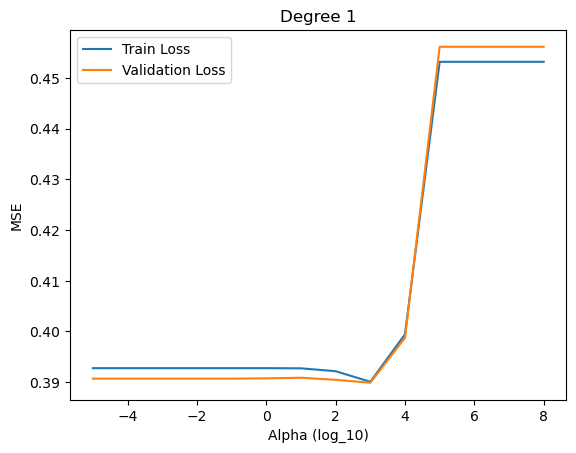

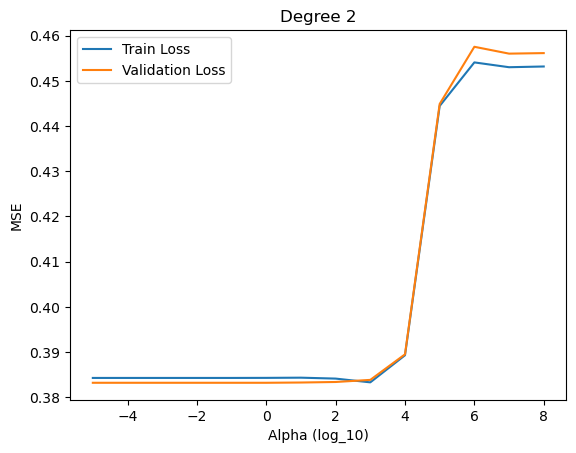

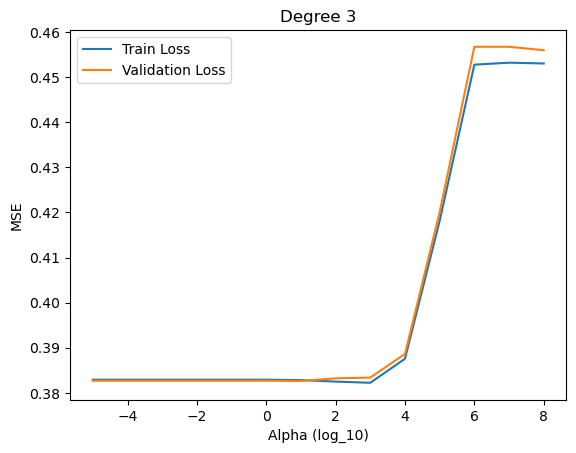

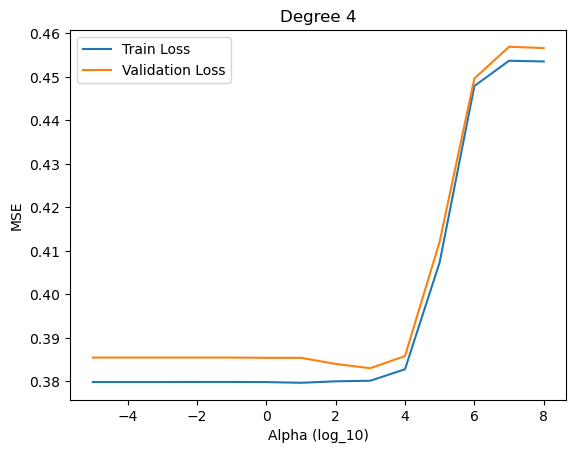

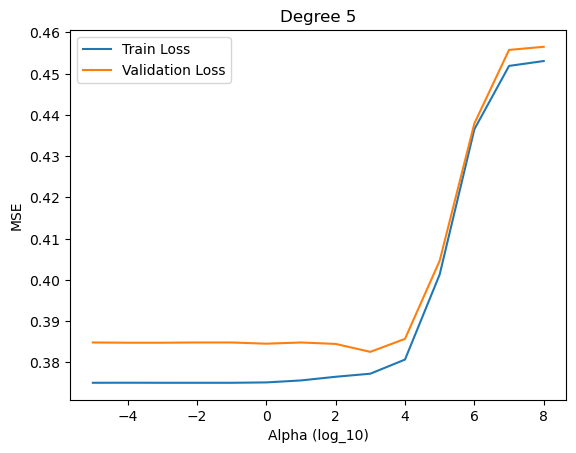

In [9]:
alpha = [10**i for i in range(-5, 9)]

for degree in range(1, 6):
    train_data = (raw_train_data - train_mean) / (train_std + 1e-8)
    val_data = (raw_val_data - train_mean) / (train_std + 1e-8)

    poly_trans = sklearn.preprocessing.PolynomialFeatures(degree).fit(train_data)
    train_data = poly_trans.transform(train_data)
    val_data = poly_trans.transform(val_data)
    
    train_losses = []
    val_losses = []
    for a in alpha:
        model = sklearn.linear_model.Ridge(alpha = a, fit_intercept = False)
        model.fit(train_data, train_label.ravel())
        train_pred = [1 if p >= 0.5 else 0 for p in model.predict(train_data)]
        val_pred = [1 if p >= 0.5 else 0 for p in model.predict(val_data)]

        train_losses.append(sklearn.metrics.mean_squared_error(train_label, train_pred))
        val_losses.append(sklearn.metrics.mean_squared_error(val_label, val_pred))

    plt.plot(range(-5, 9), train_losses, label = "Train Loss")
    plt.plot(range(-5, 9), val_losses, label = "Validation Loss")
    plt.title(f'Degree {degree}')
    plt.xlabel("Alpha (log_10)")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()
            

### Different threshold

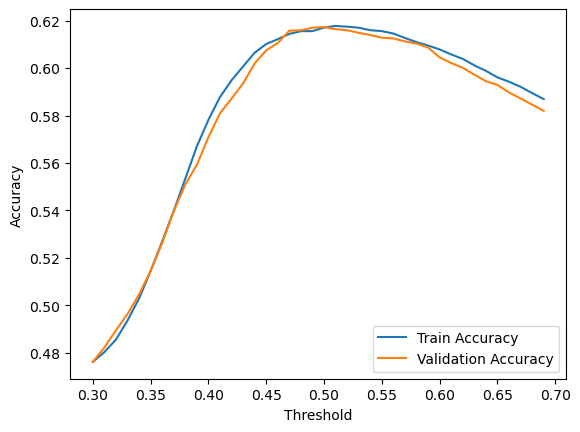

max train accuracy: 0.6177988338192419, happened when threshold is 0.51
max val accuracy: 0.6173400967873593, happened when threshold is 0.5


In [10]:
train_data = (raw_train_data - train_mean) / (train_std + 1e-8)
val_data = (raw_val_data - train_mean) / (train_std + 1e-8)

poly_trans = sklearn.preprocessing.PolynomialFeatures(3).fit(train_data)
train_data = poly_trans.transform(train_data)
val_data = poly_trans.transform(val_data)

train_accuracies = []
val_accuracies = []

for threshold in np.arange(0.3, 0.7, 0.01):
    model = sklearn.linear_model.Ridge(alpha = 1.0)
    model.fit(train_data, train_label)
    val_pred = [1 if p >= threshold else 0 for p in model.predict(val_data)]
    train_pred = [1 if p >= threshold else 0 for p in model.predict(train_data)]
    train_accuracies.append(sklearn.metrics.accuracy_score(train_label, train_pred))
    val_accuracies.append(sklearn.metrics.accuracy_score(val_label, val_pred))

plt.plot(np.arange(0.3, 0.7, 0.01), train_accuracies, label = "Train Accuracy")
plt.plot(np.arange(0.3, 0.7, 0.01), val_accuracies, label = "Validation Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print(f'max train accuracy: {max(train_accuracies)}, happened when threshold is {0.3 + 0.01 * np.argmax(train_accuracies)}')
print(f'max val accuracy: {max(val_accuracies)}, happened when threshold is {0.3 + 0.01 * np.argmax(val_accuracies)}')

## Find best 3 features

### Use Random Forest to find

In [11]:
train_data = (raw_train_data - train_mean) / (train_std + 1e-8)
val_data = (raw_val_data - train_mean) / (train_std + 1e-8)

forest = sklearn.ensemble.RandomForestClassifier(random_state = 42, criterion = 'entropy', max_depth = 10)
forest.fit(train_data, train_label.ravel())

RF_train_pred = forest.predict(train_data)
RF_val_pred = forest.predict(val_data)

print(f'Train accuracy: {sklearn.metrics.accuracy_score(train_label, RF_train_pred)}')
print(f'Val accuracy: {sklearn.metrics.accuracy_score(val_label, RF_val_pred)}')

Train accuracy: 0.6388921282798834
Val accuracy: 0.6193224884846364


In [12]:
RF_importance = forest.feature_importances_
RF_sorted_index = np.argsort(RF_importance)[::-1]

rank = 1
for i in RF_sorted_index:
    print(f'rank {rank}: {x_train_pd.columns.values[i]:<15} with importance score {RF_importance[i]}')
    rank += 1

rank 1: SHOT_DIST       with importance score 0.36744586230037574
rank 2: CLOSE_DEF_DIST  with importance score 0.17867332509386694
rank 3: SHOT_CLOCK      with importance score 0.1318623132510394
rank 4: TOUCH_TIME      with importance score 0.11412524576717183
rank 5: GAME_CLOCK      with importance score 0.08351463915607113
rank 6: PTS_TYPE        with importance score 0.05420551575402893
rank 7: DRIBBLES        with importance score 0.04369417729069078
rank 8: PERIOD          with importance score 0.026478921386755352


### Use XGBoost to find

In [13]:
xgboost = sklearn.ensemble.GradientBoostingClassifier(random_state = 42)
xgboost.fit(train_data, train_label.ravel())

XGB_train_pred = xgboost.predict(train_data)
XGB_val_pred = xgboost.predict(val_data)

print(f'Train accuracy: {sklearn.metrics.accuracy_score(train_label, XGB_train_pred)}')
print(f'Val accuracy: {sklearn.metrics.accuracy_score(val_label, XGB_val_pred)}')

Train accuracy: 0.6224781341107871
Val accuracy: 0.6214797970963792


In [14]:
XGB_importance = xgboost.feature_importances_
XGB_sorted_index = np.argsort(XGB_importance)[::-1]

rank = 1
for i in XGB_sorted_index:
    print(f'rank {rank}: {x_train_pd.columns.values[i]:<15} with importance score {XGB_importance[i]}')
    rank += 1

rank 1: SHOT_DIST       with importance score 0.5874138211364776
rank 2: CLOSE_DEF_DIST  with importance score 0.255424575554939
rank 3: TOUCH_TIME      with importance score 0.087596255535411
rank 4: SHOT_CLOCK      with importance score 0.05369179242758124
rank 5: GAME_CLOCK      with importance score 0.006594226114682324
rank 6: DRIBBLES        with importance score 0.00556580283471591
rank 7: PERIOD          with importance score 0.0037135263961927648
rank 8: PTS_TYPE        with importance score 0.0


### Decide the third feature

In [15]:
RF_train_acc = sklearn.metrics.accuracy_score(train_label, RF_train_pred)
RF_val_acc = sklearn.metrics.accuracy_score(val_label, RF_val_pred)
XGB_train_acc = sklearn.metrics.accuracy_score(train_label, XGB_train_pred)
XGB_val_acc = sklearn.metrics.accuracy_score(val_label, XGB_val_pred)
# print(RF_train_acc, RF_val_acc)
# print(XGB_train_acc, XGB_val_acc)

candidate1 = x_train_pd.columns.values[RF_sorted_index[2]]
candidate2 = x_train_pd.columns.values[RF_sorted_index[3]]
# print(candidate1)
# print(candidate2)


score1 = (RF_train_acc + RF_val_acc) * RF_importance[RF_sorted_index[2]] + (XGB_train_acc + XGB_val_acc) * XGB_importance[XGB_sorted_index[3]]
score2 = (RF_train_acc + RF_val_acc) * RF_importance[RF_sorted_index[3]] + (XGB_train_acc + XGB_val_acc) * XGB_importance[XGB_sorted_index[2]]

print(f'{candidate1:<10}\'s score is {score1}')
print(f'{candidate2:<10}\'s score is {score2}')

SHOT_CLOCK's score is 0.23270142096385815
TOUCH_TIME's score is 0.2525601091834229


## Train the model with selected features

In [16]:
selected_train = train_data[:, XGB_sorted_index[:3]]
selected_val = val_data[:, XGB_sorted_index[:3]]
print(selected_train.shape, selected_val.shape)

poly_trans = sklearn.preprocessing.PolynomialFeatures(3).fit(selected_train)
selected_train = poly_trans.transform(selected_train)
selected_val = poly_trans.transform(selected_val)

model = sklearn.linear_model.Ridge(alpha = 1.0)
model.fit(selected_train, train_label.ravel())
selected_train_pred = [1 if p >= 0.5 else 0 for p in model.predict(selected_train)]
selected_val_pred = [1 if p >= 0.5 else 0 for p in model.predict(selected_val)]

print(f'Train MSE is {sklearn.metrics.mean_squared_error(train_label, selected_train_pred)}')
print(f'Val MSE is {sklearn.metrics.mean_squared_error(val_label, selected_val_pred)}')
print(f'Train accuracy is { sklearn.metrics.accuracy_score(train_label, selected_train_pred)}')
print(f'Val accuracy is {sklearn.metrics.accuracy_score(val_label, selected_val_pred)}')

(68600, 3) (17151, 3)
Train MSE is 0.3843586005830904
Val MSE is 0.3827182088507959
Train accuracy is 0.6156413994169097
Val accuracy is 0.6172817911492041


## Predict the test data

In [17]:
test_data = (x_test - train_mean) / (train_std + 1e-8)
print(test_data.shape)

selected_test = test_data[:, XGB_sorted_index[:3]]
print(selected_test.shape)

selected_test = poly_trans.transform(selected_test)
selected_test_pred = np.array([1 if p >= 0.5 else 0 for p in model.predict(selected_test)])
print(selected_test_pred.shape)

selected_test_pred_pd = pd.DataFrame(selected_test_pred.tolist(), columns = ['FGM'])
print(selected_test_pred_pd)

selected_test_pred_pd.to_csv('./Lab05_114062646_y_pred.csv', index = False)

(36751, 8)
(36751, 3)
(36751,)
       FGM
0        0
1        0
2        1
3        1
4        1
...    ...
36746    0
36747    0
36748    0
36749    0
36750    0

[36751 rows x 1 columns]


## Report

### Preprocess

因為擔心各feature之間的值大小會影響到參數，進而影響到模型的表現，我在expand feature之前有先對每個feature做standardization

### Train with all features

一開始我使用上課所教的Ridge與Lasso進行預測，發現效果差不多後我又多跑了一個SGD，但不論是何者accuracy都在0.61左右浮動 <BR>
我知道scikit learn裡面有內建的RidgeClassifier，但是因為我原先想測試Ridge跟Lasso兩者在這次lab的差異會不會到很大，所以我選擇在預測之後去判斷output有沒有大於某個threshold <BR>
這樣既可以測試Lasso以及SGD等其他linear model，也可以讓預測的門檻較為彈性 <BR>

從後面不同的degree與alpha所繪製出來的五張error curve，我們可以發現在degree = 3的時候train loss與val loss有較高的一致性以及較低的數值，所以我們選擇degree = 3 <BR>
接著，在degree = 3的error curve可以看到alpha在小於100的情況下對模型的最終表現是幾乎沒有影響的，因此我們選擇alpha = 1.0，也就是model本身的預設值 <BR>
最後，從threshold-accuracy圖我們可以發現在threshold = 0.5的時候模型有最佳的準確率，因此，雖然最後的結果與直接呼叫RidgeClassifier相同，我們依然選擇Ridge搭配threshold = 0.5去作為接下來的模型

### Find best 3 features

挑選出最終的模型以及最佳的hyperparameters後，我透過random forest以及XGBoost兩個模型去判斷feature中哪些對模型的表現影響最大 <BR>
從兩個模型的結果我們不難發現SHOT_DIST、CLOSE_DEF_DIST這兩個會是影響最大的feature <BR>
但是對於影響力第三的feature，兩個模型給出了不同的答案 <BR>

為了判斷究竟是TOUCH_TIME還是SHOT_CLOCK對模型的影響較大，我考慮了random forest以及XGBoost的train/val accuracy，透過將這兩個feature各自在model的重要程度作為權重，我們可以計算出他們最終的分數 <BR>
<BR>
$$score = (RF\_train\_acc + RF\_val\_acc) \times RF\_importances + (XGB\_train\_acc + XGB\_val\_acc) \times XGB\_importances$$
<BR>
而根據最終的分數，我們可以發現TOUCH_TIME相對較為重要，因此我們挑選TOUCH_TIME作為我們第三個feature<BR>
在使用selected feature重新訓練後，我們可以發現模型的效能不論是在train還是val都幾乎沒有減少，這可以說明我們挑選的feature的確是最為重要的三個features